# General Tips
## Using virtual environments
**Step 1:** CD to desired directory and Create a Virtual Environment `python3 -m venv myenv`. (Run `py -3.13 -m venv myenv` for a specific version of python)

Check your python installed versions with `py -0` on Windows (`python3 --version` on Linux)

**Step 2:** Activate the Environment `source myenv/bin/activate` (on Linux) and `myenv\Scripts\activate` (on Windows).

**Step 3:** Install Any Needed Packages. e.g: `pip install requests pandas`. Or better to use `requirements.txt` file (`pip install -r requirements.txt`)

**Step 4:** List All Installed Packages using `pip list`

## Connecting the Jupyter Notebook to the vistual env
1. Make sure that myenv is activate (`myenv\Scripts\activate`)
2. Run this inside the virtual environment: `pip install ipykernel`
3. Still inside the environment: `python -m ipykernel install --user --name=myenv --display-name "Whatever Python Kernel Name"`
   
   --name=myenv: internal identifier for the kernel
   
   --display-name: name that shows up in VS Code kernel picker
4. Open VS Code and select the kernel

   At the top-right, click "Select Kernel".
   Look for “Whatever Python Kernel Name” — pick that.
5. If you don’t see it right away, try: Reloading VS Code, Or running Reload Window from Command Palette (Ctrl+Shift+P)

## Useful Commands
1. Use `py -0` to check which python installation we have on Windows

In [1]:
# Step 1: Load and Preview FinanceBench Data

from datasets import load_dataset
import pandas as pd

# Load the FinanceBench dataset (train split)
ds = load_dataset("PatronusAI/financebench", split="train")

# Display the number of records
print(f"Number of records: {len(ds)}")

# Convert first 3 records to a DataFrame for easy preview
df_preview = pd.DataFrame(ds[:3])
pd.set_option('display.max_colwidth', 300)
display(df_preview.T)  # Transposed for easier reading

# Optionally: check the structure of the 'evidence' field in the first record
print("Sample 'evidence' field:")
print(ds[0]['evidence'])

/Users/mehrdad/projects/finance-rag/finance-rag/labs/financebench_bm_llm_generation/venv_fb_bm_llm_g/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/mehrdad/projects/finance-rag/finance-rag/labs/financebench_bm_llm_generation/venv_fb_bm_llm_g/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Number of records: 150


,0,1,2
financebench_id,financebench_id_03029,financebench_id_04672,financebench_id_00499
company,3M,3M,3M
doc_name,3M_2018_10K,3M_2018_10K,3M_2022_10K
question_type,metrics-generated,metrics-generated,domain-relevant
question_reasoning,Information extraction,Information extraction,Logical reasoning (based on numerical reasoning)
domain_question_num,None,None,dg06
question,What is the FY2018 capital expenditure amount (in USD millions) for 3M? Give a response to the question by relying on the details shown in the cash flow statement.,Assume that you are a public equities analyst. Answer the following question by primarily using information that is shown in the balance sheet: what is the year end FY2018 net PPNE for 3M? Answer in USD billions.,Is 3M a capital-intensive business based on FY2022 data?
answer,$1577.00,$8.70,"No, the company is managing its CAPEX and Fixed Assets pretty efficiently, which is evident from below key metrics:\nCAPEX/Revenue Ratio: 5.1%\nFixed assets/Total Assets: 20%\nReturn on Assets= 12.4%"
justification,"The metric capital expenditures was directly extracted from the company 10K. The line item name, as seen in the 10K, was: Purchases of property, plant and equipment (PP&E).","The metric ppne, net was directly extracted from the company 10K. The line item name, as seen in the 10K, was: Property, plant and equipment â net.",CAPEX/Revenue\nFixed Assets/Total Assets\nROA=Net Income/Total Assets
dataset_subset_label,OPEN_SOURCE,OPEN_SOURCE,OPEN_SOURCE


Sample 'evidence' field:
[{'evidence_text': 'Table of Contents \n3M Company and Subsidiaries\nConsolidated Statement of Cash Flow s\nYears ended December 31\n \n(Millions)\n \n2018\n \n2017\n \n2016\n \nCash Flows from Operating Activities\n \n \n \n \n \n \n \nNet income including noncontrolling interest\n \n$\n5,363 \n$\n4,869 \n$\n5,058 \nAdjustments to reconcile net income including noncontrolling interest to net cash\nprovided by operating activities\n \n \n \n \n \n \n \nDepreciation and amortization\n \n \n1,488 \n \n1,544 \n \n1,474 \nCompany pension and postretirement contributions\n \n \n(370) \n \n(967) \n \n(383) \nCompany pension and postretirement expense\n \n \n410 \n \n334 \n \n250 \nStock-based compensation expense\n \n \n302 \n \n324 \n \n298 \nGain on sale of businesses\n \n \n(545) \n \n(586) \n \n(111) \nDeferred income taxes\n \n \n(57) \n \n107 \n \n 7 \nChanges in assets and liabilities\n \n \n \n \n \n \n \nAccounts receivable\n \n \n(305) \n \n(245) \n \n(313)

In [7]:
# Step 2: Normalize FinanceBench Data (using all evidence texts)

import pandas as pd

def extract_evidence_text(evidence_list):
    """Concatenate all evidence_text fields from the evidence list."""
    if evidence_list and isinstance(evidence_list, list):
        if len(evidence_list) > 1:
            print(f"containing {len(evidence_list)} evidence items")
        texts = [e.get("evidence_text", "") for e in evidence_list if "evidence_text" in e]
        return "\n\n".join(texts)
    return ""

# Build a normalized DataFrame
data = []
for record in ds:
    data.append({
        "financebench_id": record.get("financebench_id"),
        "company": record.get("company"),
        "doc_name": record.get("doc_name"),
        "question": record.get("question"),
        "answer": record.get("answer"),
        "evidence_text": extract_evidence_text(record.get("evidence", []))
    })

df = pd.DataFrame(data)

# Show a preview
print("Preview of normalized data:")
display(df.head(3).T)

containing 3 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 3 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 3 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 3 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
Preview of normalize

,0,1,2
financebench_id,financebench_id_03029,financebench_id_04672,financebench_id_00499
company,3M,3M,3M
doc_name,3M_2018_10K,3M_2018_10K,3M_2022_10K
question,What is the FY2018 capital expenditure amount (in USD millions) for 3M? Give a response to the question by relying on the details shown in the cash flow statement.,Assume that you are a public equities analyst. Answer the following question by primarily using information that is shown in the balance sheet: what is the year end FY2018 net PPNE for 3M? Answer in USD billions.,Is 3M a capital-intensive business based on FY2022 data?
answer,$1577.00,$8.70,"No, the company is managing its CAPEX and Fixed Assets pretty efficiently, which is evident from below key metrics:\nCAPEX/Revenue Ratio: 5.1%\nFixed assets/Total Assets: 20%\nReturn on Assets= 12.4%"
evidence_text,"Table of Contents \n3M Company and Subsidiaries\nConsolidated Statement of Cash Flow s\nYears ended December 31\n \n(Millions)\n \n2018\n \n2017\n \n2016\n \nCash Flows from Operating Activities\n \n \n \n \n \n \n \nNet income including noncontrolling interest\n \n$\n5,363 \n$\n4,869 \n$\n5,058...","Table of Contents \n3M Company and Subsidiaries\nConsolidated Balance Shee t\nAt December 31\n \n \n \nDecember 31,\n \nDecember 31,\n \n(Dollars in millions, except per share amount)\n \n2018\n \n2017\n \nAssets\n \n \n \n \n \nCurrent assets\n \n \n \n \n \nCash and cash equivalents\n \n$\n2,8...","3M Company and Subsidiaries\nConsolidated Statement of Income\nYears ended December 31\n(Millions, except per share amounts)\n2022\n2021\n2020\nNet sales\n$\n34,229 $\n35,355 $\n32,184\n\n3M Company and Subsidiaries\nConsolidated Balance Sheet\nAt December 31\n(Dollars in millions, except per sh..."


In [78]:
# Step 3A: Configure the list of LLM models for Ollama (via LangChain)

LLM_MODELS = [
    "llama3:8b",
    "gemma:7b",
    #"qwen3:8b"
   #"deepseek-r1:7b"
]

In [79]:
# Step 3B: LangChain Ollama LLM Setup
from langchain_community.llms import Ollama

# Build a dictionary of LLMs (keyed by model name)
llm_dict = {}
for model_name in LLM_MODELS:
    llm = Ollama(model=model_name)
    llm_dict[model_name] = llm

print(f"LLMs configured: {list(llm_dict.keys())}")

LLMs configured: ['llama3:8b', 'gemma:7b']


In [80]:
from langchain.prompts import PromptTemplate

prompt_template = PromptTemplate(
    input_variables=["context", "question"],
    template=(
        "You are a financial assistant. Using only the information provided in the context below, "
        "answer the question as concisely and factually as possible. "
        "Do not provide explanations, reasoning, or analysis—only provide the answer itself.\n\n"
        "Context:\n{context}\n\n"
        "Question:\n{question}\n\n"
        "Answer:"
    )
)

# Example: formatting a prompt for the first row
test_prompt = prompt_template.format(
    context=df.iloc[0]["evidence_text"],
    question=df.iloc[0]["question"]
)
print(test_prompt)

You are a financial assistant. Using only the information provided in the context below, answer the question as concisely and factually as possible. Do not provide explanations, reasoning, or analysis—only provide the answer itself.

Context:
Table of Contents 
3M Company and Subsidiaries
Consolidated Statement of Cash Flow s
Years ended December 31
 
(Millions)
 
2018
 
2017
 
2016
 
Cash Flows from Operating Activities
 
 
 
 
 
 
 
Net income including noncontrolling interest
 
$
5,363 
$
4,869 
$
5,058 
Adjustments to reconcile net income including noncontrolling interest to net cash
provided by operating activities
 
 
 
 
 
 
 
Depreciation and amortization
 
 
1,488 
 
1,544 
 
1,474 
Company pension and postretirement contributions
 
 
(370) 
 
(967) 
 
(383) 
Company pension and postretirement expense
 
 
410 
 
334 
 
250 
Stock-based compensation expense
 
 
302 
 
324 
 
298 
Gain on sale of businesses
 
 
(545) 
 
(586) 
 
(111) 
Deferred income taxes
 
 
(57) 
 
107 
 
 7

In [81]:
# Step 4: Run each question/context through each LLM, collect and store results
from tqdm.auto import tqdm

num_samples = 150  # Max = 150

def extract_final_answer(llm_output):
    """
    Returns only the text after 'Answer:' in the LLM output, if present.
    Otherwise returns the whole output.
    """
    marker = "Answer:"
    if marker in llm_output:
        # Split and take everything after the first occurrence of 'Answer:'
        return llm_output.split(marker, 1)[1].strip()
    else:
        return llm_output.strip()

df_subset = df.head(num_samples)  # Creates a new DataFrame with the first N rows

results = []

for model_name, llm in llm_dict.items():
    print(f"Running inference with model: {model_name}")
    for idx, row in tqdm(df_subset.iterrows(), total=len(df_subset), desc=f"{model_name}"):
        # Format the prompt
        prompt = prompt_template.format(
            context=row["evidence_text"],
            question=row["question"]
        )
        # Call the LLM (LangChain wrapper)
        try:
            generated_answer = llm(prompt)
            postprocessed_answer = extract_final_answer(generated_answer)
        except Exception as e:
            print(f"Error on row {idx}, model {model_name}: {e}")
            postprocessed_answer = "ERROR: " + str(e)
        
        # Store results
        results.append({
            "financebench_id": row["financebench_id"],
            "company": row["company"],
            "doc_name": row["doc_name"],
            "question": row["question"],
            "evidence_text": row["evidence_text"],
            "reference_answer": row["answer"],
            "model": model_name,
            "generated_answer": postprocessed_answer
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("Preview of results:")
display(results_df.head(3).T)

# Save results for future evaluation
results_df.to_csv("financebench_llm_results.csv", index=False)
results_df.to_json("financebench_llm_results.json", orient="records", lines=True)

Running inference with model: llama3:8b


llama3:8b: 100%|██████████| 150/150 [23:08<00:00,  9.25s/it]


Running inference with model: gemma:7b


gemma:7b: 100%|██████████| 150/150 [32:07<00:00, 12.85s/it]

Preview of results:


,0,1,2
financebench_id,financebench_id_03029,financebench_id_04672,financebench_id_00499
company,3M,3M,3M
doc_name,3M_2018_10K,3M_2018_10K,3M_2022_10K
question,What is the FY2018 capital expenditure amount (in USD millions) for 3M? Give a response to the question by relying on the details shown in the cash flow statement.,Assume that you are a public equities analyst. Answer the following question by primarily using information that is shown in the balance sheet: what is the year end FY2018 net PPNE for 3M? Answer in USD billions.,Is 3M a capital-intensive business based on FY2022 data?
evidence_text,"Table of Contents \n3M Company and Subsidiaries\nConsolidated Statement of Cash Flow s\nYears ended December 31\n \n(Millions)\n \n2018\n \n2017\n \n2016\n \nCash Flows from Operating Activities\n \n \n \n \n \n \n \nNet income including noncontrolling interest\n \n$\n5,363 \n$\n4,869 \n$\n5,058...","Table of Contents \n3M Company and Subsidiaries\nConsolidated Balance Shee t\nAt December 31\n \n \n \nDecember 31,\n \nDecember 31,\n \n(Dollars in millions, except per share amount)\n \n2018\n \n2017\n \nAssets\n \n \n \n \n \nCurrent assets\n \n \n \n \n \nCash and cash equivalents\n \n$\n2,8...","3M Company and Subsidiaries\nConsolidated Statement of Income\nYears ended December 31\n(Millions, except per share amounts)\n2022\n2021\n2020\nNet sales\n$\n34,229 $\n35,355 $\n32,184\n\n3M Company and Subsidiaries\nConsolidated Balance Sheet\nAt December 31\n(Dollars in millions, except per sh..."
reference_answer,$1577.00,$8.70,"No, the company is managing its CAPEX and Fixed Assets pretty efficiently, which is evident from below key metrics:\nCAPEX/Revenue Ratio: 5.1%\nFixed assets/Total Assets: 20%\nReturn on Assets= 12.4%"
model,llama3:8b,llama3:8b,llama3:8b
generated_answer,"The FY2018 capital expenditure amount (in USD millions) for 3M is $(1,577).",$0.04 billion\n\n(Note: Net PPNE stands for Pension and Postretirement Benefits),No.


## Evaluation

In [1]:
# Step 5: Manual Inspection with Pandas

# A. Load Results (if needed)
import pandas as pd

# Load CSV results
results_df = pd.read_csv("financebench_llm_results.csv")

# OR, load JSON if you prefer
# results_df = pd.read_json("financebench_llm_results.json", lines=True)

# Assume results_df is loaded and has columns:
# 'financebench_id', 'question', 'reference_answer', 'model', 'generated_answer'

# Pivot so each row is a question, and each model's answer is a column
pivot_df = results_df.pivot_table(
    index=['financebench_id', 'question', 'reference_answer'],
    columns='model',
    values='generated_answer',
    aggfunc='first'  # In case of duplicates
).reset_index()

# Optional: Rename model columns for clarity (remove multiindex if it appears)
pivot_df.columns.name = None

# Show more rows, and wider columns for easier reading
pd.set_option('display.max_colwidth', 300)
display(pivot_df)


,financebench_id,question,reference_answer,gemma:7b,llama3:8b
0,financebench_id_00005,"Does Corning have positive working capital based on FY2022 data? If working capital is not a useful or relevant metric for this company, then please state that and explain why.",Yes. Corning had a positive working capital amount of $831 million by FY 2022 close. This answer considers only operating current assets and current liabilities that were clearly shown in the balance sheet.,"Based on the FY2022 data provided, Corning has positive working capital, with total current assets of $7,453 million and total current liabilities of $5,175 million.",Yes.
1,financebench_id_00070,"Does American Water Works have positive working capital based on FY2022 data? If working capital is not a useful or relevant metric for this company, then please state that and explain why.","No, American Water Works had negative working capital of -$1561M in FY 2022.","Based on the FY2022 data, American Water Works has positive working capital (1,250 - 2,811 = 939 million).","Yes, American Water Works has positive working capital based on FY2022 data. Total current assets ($1,250 million) exceed total current liabilities ($2,811 million)."
2,financebench_id_00080,"Does Paypal have positive working capital based on FY2022 data? If working capital is not a useful or relevant metric for this company, then please state that and explain why.",Yes. Paypal has a positive working capital of $ 1.6Bn as of FY2022 end.,"Based on the FY2022 data, PayPal has positive working capital (current assets - current liabilities = $57,517 - $45,101 = $12,416).","Yes, PayPal has positive working capital based on FY2022 data."
3,financebench_id_00206,"Are JPM's gross margins historically consistent (not fluctuating more than roughly 2% each year)? If gross margins are not a relevant metric for a company like this, then please state that and explain why.","Since JPM is a financial institution, gross margin is not a relevant metric.","The provided text does not contain any information regarding JPM's historical gross margins, so I am unable to answer this question from the given context.",No.
4,financebench_id_00215,Is Verizon a capital intensive business based on FY 2022 data?,"Yes. Verizon's capital intensity ratio was approximately 2.774729. This means that it took approximately $2.77 of assets to generate $1 of revenue and thus, Verizon can be considered capital intensive.","The provided text does not contain information regarding Verizon's capital intensity levels in FY 2022, so I am unable to answer the question from the given context.",Yes.
...,...,...,...,...,...
145,financebench_id_10130,"Based on the information provided primarily in the balance sheet and the statement of income, what is FY2020 days payable outstanding (DPO) for Corning? DPO is defined as: 365 * (average accounts payable between FY2019 and FY2020) / (FY2020 COGS + change in inventory between FY2019 and FY2020). ...",63.86,"The provided text does not include information regarding FY2020 accounts payable, cost of goods sold, or inventory changes, so I am unable to extract the requested data from the given context.","Based on the provided information:\n\nCOGS: $7,772 (2020), $7,468 (2019)\nChange in Inventory: $(118) = $2,320 (2020) - $2,438 (2019)\n\nAverage Accounts Payable: ($1,174 + 1,587) / 2 = $1,880.5\n\nDPO: 365 * ($1,880.5) / ($7,772 + (-118)) = 134.21 days"
146,financebench_id_10136,We want to calculate a financial metric. Please help us compute it by basing your answers off of the cash flow statement and the income statement. Here's the question: what is the FY2022 retention ratio (using total cash dividends paid and net income attributable to shareholders) for General Mil...,0.54,0.68,"To calculate the FY2022 retention ratio, you need to divide the total cash dividends paid by the net income attributable to shareholders. From the provided information:\n\nCash dividends paid: $1,244.5 million (from the Financi

In [2]:
import pandas as pd
import re

def clean_text(text):
    """Lowercase, remove punctuation, and strip leading/trailing spaces."""
    if pd.isnull(text):
        return ""
    # Lowercase
    text = text.lower()
    # Remove punctuation
    #text = re.sub(r'[^\w\s]', '', text)
    # Strip
    return text.strip()

# Assume `pivot_df` is your DataFrame (with columns: 'reference_answer', model1, model2, ...)
pivot_df['reference_answer_clean'] = pivot_df['reference_answer'].apply(clean_text)

# Clean all model answer columns (assuming first 3 columns are IDs and 'reference_answer')
model_cols = [col for col in pivot_df.columns if col not in ['financebench_id', 'question', 'reference_answer', 'reference_answer_clean']]
for model in model_cols:
    pivot_df[model + '_clean'] = pivot_df[model].apply(clean_text)

# Preview
pivot_df[[ 'question', 'reference_answer_clean'] + [col+'_clean' for col in model_cols]].head()

,question,reference_answer_clean,gemma:7b_clean,llama3:8b_clean
0,"Does Corning have positive working capital based on FY2022 data? If working capital is not a useful or relevant metric for this company, then please state that and explain why.",yes. corning had a positive working capital amount of $831 million by fy 2022 close. this answer considers only operating current assets and current liabilities that were clearly shown in the balance sheet.,"based on the fy2022 data provided, corning has positive working capital, with total current assets of $7,453 million and total current liabilities of $5,175 million.",yes.
1,"Does American Water Works have positive working capital based on FY2022 data? If working capital is not a useful or relevant metric for this company, then please state that and explain why.","no, american water works had negative working capital of -$1561m in fy 2022.","based on the fy2022 data, american water works has positive working capital (1,250 - 2,811 = 939 million).","yes, american water works has positive working capital based on fy2022 data. total current assets ($1,250 million) exceed total current liabilities ($2,811 million)."
2,"Does Paypal have positive working capital based on FY2022 data? If working capital is not a useful or relevant metric for this company, then please state that and explain why.",yes. paypal has a positive working capital of $ 1.6bn as of fy2022 end.,"based on the fy2022 data, paypal has positive working capital (current assets - current liabilities = $57,517 - $45,101 = $12,416).","yes, paypal has positive working capital based on fy2022 data."
3,"Are JPM's gross margins historically consistent (not fluctuating more than roughly 2% each year)? If gross margins are not a relevant metric for a company like this, then please state that and explain why.","since jpm is a financial institution, gross margin is not a relevant metric.","the provided text does not contain any information regarding jpm's historical gross margins, so i am unable to answer this question from the given context.",no.
4,Is Verizon a capital intensive business based on FY 2022 data?,"yes. verizon's capital intensity ratio was approximately 2.774729. this means that it took approximately $2.77 of assets to generate $1 of revenue and thus, verizon can be considered capital intensive.","the provided text does not contain information regarding verizon's capital intensity levels in fy 2022, so i am unable to answer the question from the given context.",yes.


In [3]:
# Compute ROUGE & BLEU for All Models

import evaluate

# Initialize metrics
rouge = evaluate.load("rouge")
bleu = evaluate.load("bleu")

eval_records = []

# Identify model columns with cleaned answers
model_clean_cols = [col for col in pivot_df.columns if col.endswith('_clean') and col != 'reference_answer_clean']

for model_col in model_clean_cols:
    model_name = model_col.replace('_clean', '')
    print(f"Evaluating model: {model_name}")
    for idx, row in pivot_df.iterrows():
        reference = row['reference_answer_clean']
        prediction = row[model_col]
        
        # ROUGE returns a dict with all variants; BLEU returns a single float
        rouge_scores = rouge.compute(predictions=[prediction], references=[reference])
        bleu_score = bleu.compute(predictions=[prediction], references=[reference])['bleu']
        
        eval_records.append({
            'financebench_id': row['financebench_id'],
            'question': row['question'],
            'reference_answer': row['reference_answer'],
            'model': model_name,
            'generated_answer': row[model_name],  # original, uncleaned
            'rouge1': rouge_scores['rouge1'],
            'rouge2': rouge_scores['rouge2'],
            'rougeL': rouge_scores['rougeL'],
            'bleu': bleu_score
        })

# Results as DataFrame
eval_df = pd.DataFrame(eval_records)
display(eval_df.head())

/Users/mehrdad/projects/finance-rag/finance-rag/labs/financebench_bm_llm_generation/venv_fb_bm_llm_g/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/mehrdad/projects/finance-rag/finance-rag/labs/financebench_bm_llm_generation/venv_fb_bm_llm_g/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Evaluating model: gemma:7b
Evaluating model: llama3:8b


,financebench_id,question,reference_answer,model,generated_answer,rouge1,rouge2,rougeL,bleu
0,financebench_id_00005,"Does Corning have positive working capital based on FY2022 data? If working capital is not a useful or relevant metric for this company, then please state that and explain why.",Yes. Corning had a positive working capital amount of $831 million by FY 2022 close. This answer considers only operating current assets and current liabilities that were clearly shown in the balance sheet.,gemma:7b,"Based on the FY2022 data provided, Corning has positive working capital, with total current assets of $7,453 million and total current liabilities of $5,175 million.",0.400000,0.137931,0.300000,0.000000
1,financebench_id_00070,"Does American Water Works have positive working capital based on FY2022 data? If working capital is not a useful or relevant metric for this company, then please state that and explain why.","No, American Water Works had negative working capital of -$1561M in FY 2022.",gemma:7b,"Based on the FY2022 data, American Water Works has positive working capital (1,250 - 2,811 = 939 million).",0.322581,0.206897,0.322581,0.138178
2,financebench_id_00080,"Does Paypal have positive working capital based on FY2022 data? If working capital is not a useful or relevant metric for this company, then please state that and explain why.",Yes. Paypal has a positive working capital of $ 1.6Bn as of FY2022 end.,gemma:7b,"Based on the FY2022 data, PayPal has positive working capital (current assets - current liabilities = $57,517 - $45,101 = $12,416).",0.352941,0.187500,0.294118,0.000000
3,financebench_id_00206,"Are JPM's gross margins historically consistent (not fluctuating more than roughly 2% each year)? If gross margins are not a relevant metric for a company like this, then please state that and explain why.","Since JPM is a financial institution, gross margin is not a relevant metric.",gemma:7b,"The provided text does not contain any information regarding JPM's historical gross margins, so I am unable to answer this question from the given context.",0.153846,0.000000,0.102564,0.000000
4,financebench_id_00215,Is Verizon a capital intensive business based on FY 2022 data?,"Yes. Verizon's capital intensity ratio was approximately 2.774729. This means that it took approximately $2.77 of assets to generate $1 of revenue and thus, Verizon can be considered capital intensive.",gemma:7b,"The provided text does not contain information regarding Verizon's capital intensity levels in FY 2022, so I am unable to answer the question from the given context.",0.163934,0.101695,0.163934,0.000000


In [4]:
# Aggregate & Visualize Metrics

# A. Aggregate Mean Scores Per Model
# Group by model and calculate mean for each metric
agg_df = eval_df.groupby('model')[['rouge1', 'rouge2', 'rougeL', 'bleu']].mean().reset_index()

# Show the table
print("Mean text similarity scores per model:")
display(agg_df)

Mean text similarity scores per model:


,model,rouge1,rouge2,rougeL,bleu
0,gemma:7b,0.227488,0.101306,0.204527,0.041645
1,llama3:8b,0.198527,0.082697,0.188773,0.034789


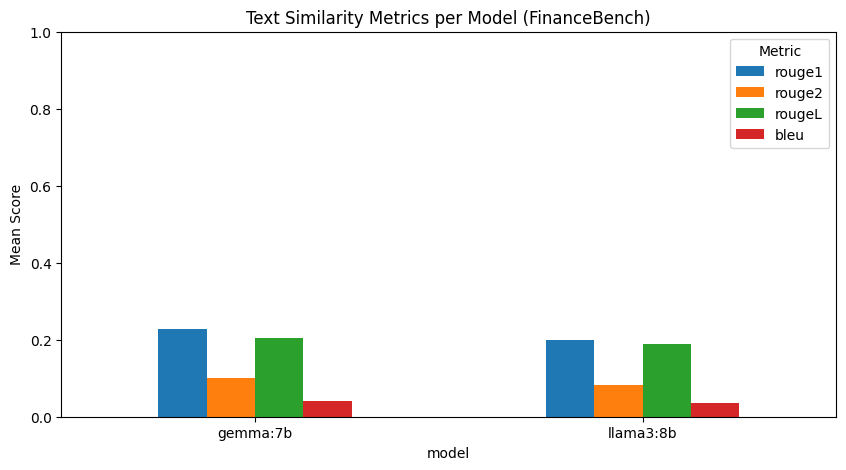

In [5]:
# B. Visualize as Bar Charts
import matplotlib.pyplot as plt

# Plot bar chart for each metric
metrics = ['rouge1', 'rouge2', 'rougeL', 'bleu']

agg_df_plot = agg_df.set_index('model')

agg_df_plot[metrics].plot.bar(figsize=(10,5))
plt.ylabel('Mean Score')
plt.title('Text Similarity Metrics per Model (FinanceBench)')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.show()

In [6]:
# C. Save Aggregated and Per-Record Results
agg_df.to_csv("financebench_model_mean_scores.csv", index=False)
eval_df.to_csv("financebench_per_record_scores.csv", index=False)

## LLM-Based Evaluation

In [16]:
from langchain.prompts import PromptTemplate

eval_prompt_template = PromptTemplate(
    input_variables=["question", "ground_truth_answer", "generated_answer"],
    template=(
        "Are the two following answers (Answer 1 and Answer 2) the same with respect to the question between single quotes ’{question}’?\n\n"
        "Answer 1: ’{ground_truth_answer}’\n"
        "Answer 2: ’{generated_answer}’\n"
        "Please just give one of answer with 'true' or 'false'. Do not include any other answer\n"
    )
)

In [ ]:
from langchain_community.llms import Ollama
# Choose your evaluator LLM (e.g. use 'llama3' or any other; you can configure as needed)
# evaluator_llm = Ollama(model="llama3:8b")  # Replace as needed
evaluator_llm = Ollama(model="gemma:7b")  # Replace as needed

eval_llm_records = []

model_cols = [col for col in pivot_df.columns if col not in ['financebench_id', 'question', 'reference_answer', 'reference_answer_clean'] and not col.endswith('_clean')]

for idx, row in pivot_df.iterrows():
    prompt = eval_prompt_template.format(
        question=row['question'],
        ground_truth_answer=row['reference_answer'],
        generated_answer=row[model_col]
    )
    eval_output = evaluator_llm(prompt).strip().lower()
    if "true" in eval_output and "false" in eval_output:
        raise ValueError(f"Ambiguous LLM eval output at row {idx}, model {model_name}: {eval_output}")
    if "true" in eval_output:
        eval_bool = "True"
    elif "false" in eval_output:
        eval_bool = "False"
    else:
        raise ValueError(f"Invalid LLM eval output at row {idx}, model {model_name}: {eval_output}")
    eval_llm_records.append({
        'financebench_id': row['financebench_id'],
        'question': row['question'],
        'reference_answer': row['reference_answer'],
        'generated_answer': row[model_col],
        'model': model_name,
        'llm_eval': eval_bool
    })

# DataFrame of LLM evaluations
llm_eval_df = pd.DataFrame(eval_llm_records)
display(llm_eval_df.head())

Evaluating model: gemma:7b with LLM judge


KeyboardInterrupt: 

LLM-based answer agreement per model:


llm_eval,False,True,True %
model,,,
gemma:7b,102,48,32.000000
llama3:8b,56,94,62.666667


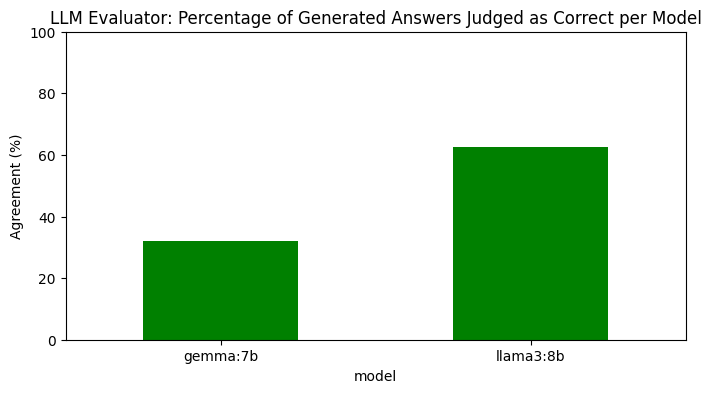

In [18]:
# Aggregation: Count and percentage of True/False by model
agg_llm_df = llm_eval_df.groupby('model')['llm_eval'].value_counts().unstack(fill_value=0)
agg_llm_df['True %'] = (agg_llm_df['True'] / (agg_llm_df['True'] + agg_llm_df['False'])) * 100

print("LLM-based answer agreement per model:")
display(agg_llm_df)

# Visualization
import matplotlib.pyplot as plt

agg_llm_df['True %'].plot(kind='bar', color='green', figsize=(8, 4))
plt.ylabel('Agreement (%)')
plt.title('LLM Evaluator: Percentage of Generated Answers Judged as Correct per Model')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.show()

In [19]:
llm_eval_df.to_csv("financebench_llm_eval_per_record.csv", index=False)
agg_llm_df.to_csv("financebench_llm_eval_aggregated.csv")